IMPORT REQUIRED LIBRARIES


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


IMPORT & READ DATA

In [ ]:
df = pd.read_csv('/content/sample_data/Sample - Superstore.csv', encoding='latin-1')


In [ ]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


Some columns (like Row ID) might be useless for our purpose. Some of them might be redundant  Later we will decide whether to drop some of them.

In [ ]:
df.tail(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9984,9985,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9986,9987,CA-2016-125794,9/29/2016,10/3/2016,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [ ]:
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2501,2502,CA-2017-131618,6/17/2017,6/20/2017,First Class,LS-17200,Luke Schmidt,Corporate,United States,Skokie,...,60076,Central,OFF-BI-10000546,Office Supplies,Binders,Avery Durable Binders,2.304,4,0.8,-3.5712
9107,9108,CA-2015-132941,5/25/2015,5/28/2015,First Class,MM-18280,Muhammed MacIntyre,Corporate,United States,Haltom City,...,76117,Central,OFF-SU-10002557,Office Supplies,Supplies,Fiskars Spring-Action Scissors,22.368,2,0.2,1.6776
1816,1817,CA-2015-164833,6/4/2015,6/4/2015,Same Day,LL-16840,Lauren Leatherbury,Consumer,United States,Seattle,...,98105,West,OFF-AR-10004685,Office Supplies,Art,Binney & Smith Crayola Metallic Colored Pencil...,9.260,2,0.0,3.0558
2674,2675,CA-2017-136875,12/3/2017,12/3/2017,Same Day,TC-21295,Toby Carlisle,Consumer,United States,San Diego,...,92024,West,OFF-PA-10000357,Office Supplies,Paper,Xerox 1888,166.440,3,0.0,79.8912
9486,9487,CA-2017-130505,10/12/2017,10/12/2017,Same Day,NF-18385,Natalie Fritzler,Consumer,United States,Wheeling,...,26003,East,FUR-TA-10001932,Furniture,Tables,"Chromcraft 48"" x 96"" Racetrack Double Pedestal...",673.344,3,0.3,-76.9536
3418,3419,CA-2015-151841,4/27/2015,5/2/2015,Standard Class,TC-21475,Tony Chapman,Home Office,United States,Aurora,...,80013,West,OFF-SU-10001574,Office Supplies,Supplies,Acme Value Line Scissors,5.840,2,0.2,0.7300
3587,3588,CA-2017-121839,9/24/2017,9/28/2017,Standard Class,MH-18115,Mick Hernandez,Home Office,United States,Lancaster,...,43130,East,TEC-PH-10002885,Technology,Phones,Apple iPhone 5,1169.694,3,0.4,-253.4337
3965,3966,CA-2014-164910,11/12/2014,11/17/2014,Second Class,DM-13345,Denise Monton,Corporate,United States,Asheville,...,28806,South,OFF-AR-10003651,Office Supplies,Art,Newell 350,7.872,3,0.2,0.8856
935,936,CA-2016-140081,6/20/2016,6/24/2016,Standard Class,CG-12040,Catherine Glotzbach,Home Office,United States,Philadelphia,...,19120,East,OFF-PA-10001870,Office Supplies,Paper,Xerox 202,15.552,3,0.2,5.4432
7443,7444,CA-2014-109932,12/9/2014,12/11/2014,First Class,VP-21760,Victoria Pisteka,Corporate,United States,Brownsville,...,78521,Central,OFF-ST-10000036,Office Supplies,Storage,Recycled Data-Pak for Archival Bound Computer ...,237.096,3,0.2,20.7459


In [ ]:
df.shape

(9994, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## **<h1>DATA WRANGLING**

In [ ]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


There are no null values in the dataset.


In [ ]:
df.duplicated().sum()

0

There are 0 duplicate value in the datset.

In [ ]:
columns_to_drop = ['Row ID', 'Order ID', 'Customer ID', 'Country', 'Product ID', 'Postal Code']
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

We have removed some useless columns from the dataset

In [ ]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,6/12/2016,6/16/2016,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.dtypes

,0
Order Date,object
Ship Date,object
Ship Mode,object
Customer Name,object
Segment,object
City,object
State,object
Region,object
Category,object
Sub-Category,object


The majority of columns are of object type. At least two of them (Order Date and Ship Date) may have to be converted into date type.

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%Y", errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%m/%d/%Y", errors='coerce')

In [ ]:
df.dtypes

,0
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer Name,object
Segment,object
City,object
State,object
Region,object
Category,object
Sub-Category,object


In [ ]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
desc_stats = df[['Sales','Quantity','Discount','Profit']].describe()
print(desc_stats)

              Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Ship Mode,9994,4,Standard Class,5968
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
City,9994,531,New York City,915
State,9994,49,California,2001
Region,9994,4,West,3203
Category,9994,3,Office Supplies,6026
Sub-Category,9994,17,Binders,1523
Product Name,9994,1850,Staple envelope,48


## **EDA** and **analysis**

**1. Total Quantity, Total Sales, Total Profit, Average Discount**

In [ ]:
total_quantity = df['Quantity'].sum()
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
Average_discount = df['Discount'].mean()
print(f"Total Quantity: {total_quantity}")
print(f"Total Sales: {total_sales}")
print(f"Total Profit: {total_profit}")
print(f"Average Discount: {Average_discount}")

Total Quantity: 37873
Total Sales: 2297200.8603000003
Total Profit: 286397.0217
Average Discount: 0.15620272163297977


**2.Sales, Profit, Quantity, Discount Distribution** (Box Plot)

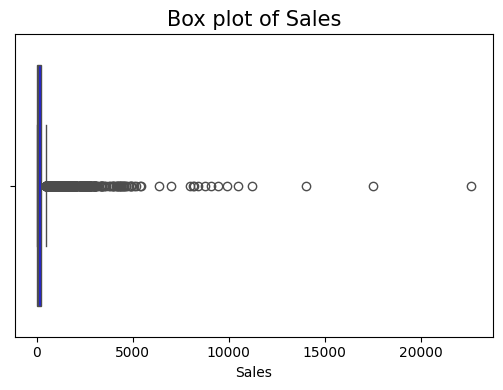

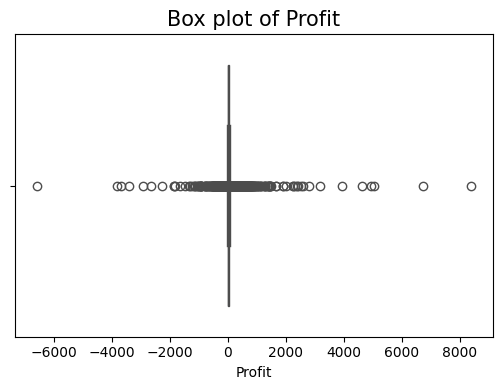

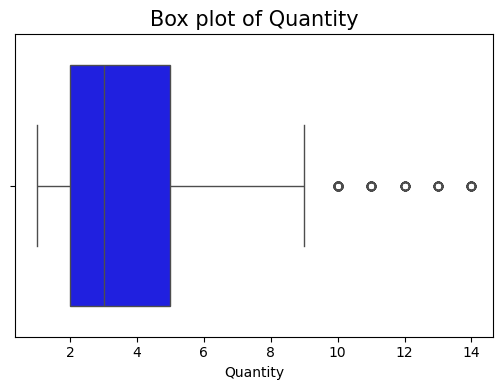

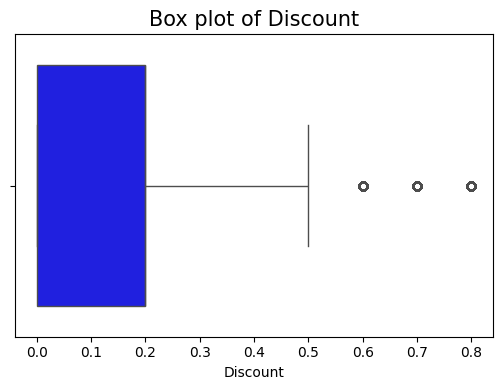

In [ ]:
features= ['Sales','Profit','Quantity','Discount']
for i,col in enumerate(features):
    bins='auto'
    if i in [0,1]:
        bins=25
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.boxplot(data=df,x=col,color='b')
    plt.title(f'Box plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

The Insights:
1. Most sales are under 5000.
2. The profit comes between -2000 and 2000.
3.Most Quantities sold comes between 2 and 5.
4.The Discount comes from 0% and 20%.

**3. Most Products sold**

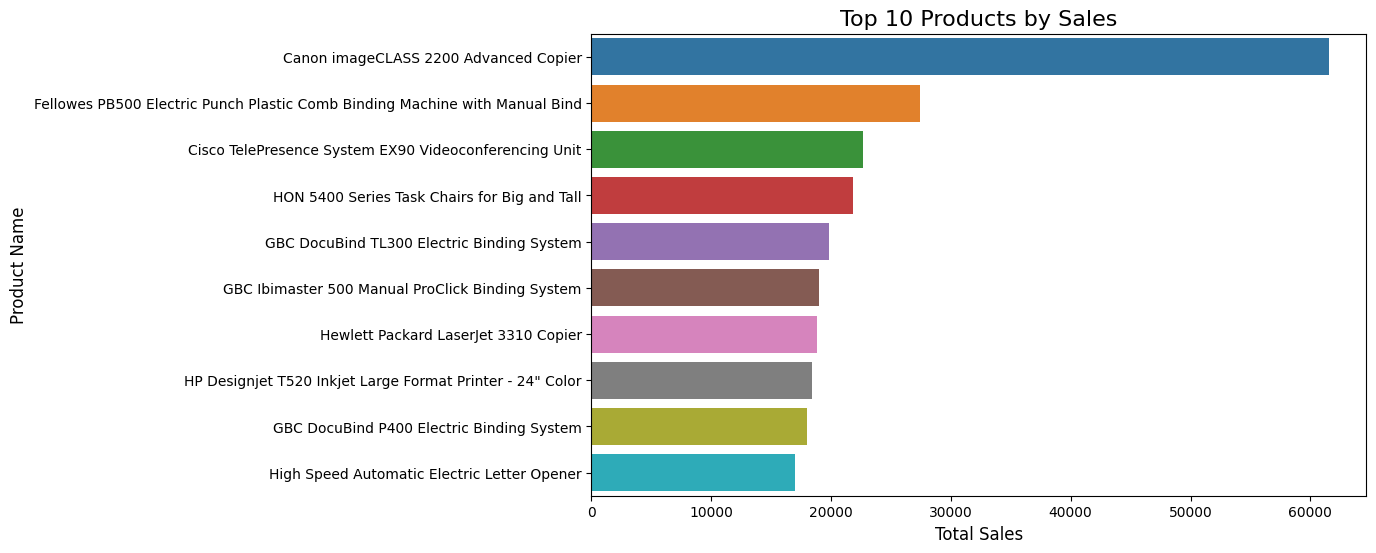

In [ ]:
top_Sales_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_Sales_products.values, y=top_Sales_products.index, hue=top_Sales_products.index, legend=False)
plt.title('Top 10 Products by Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

Insight:
Canon imgeClASS 2200 Advanced Copier is the most product sold

**4.Most Products achieve Profit**

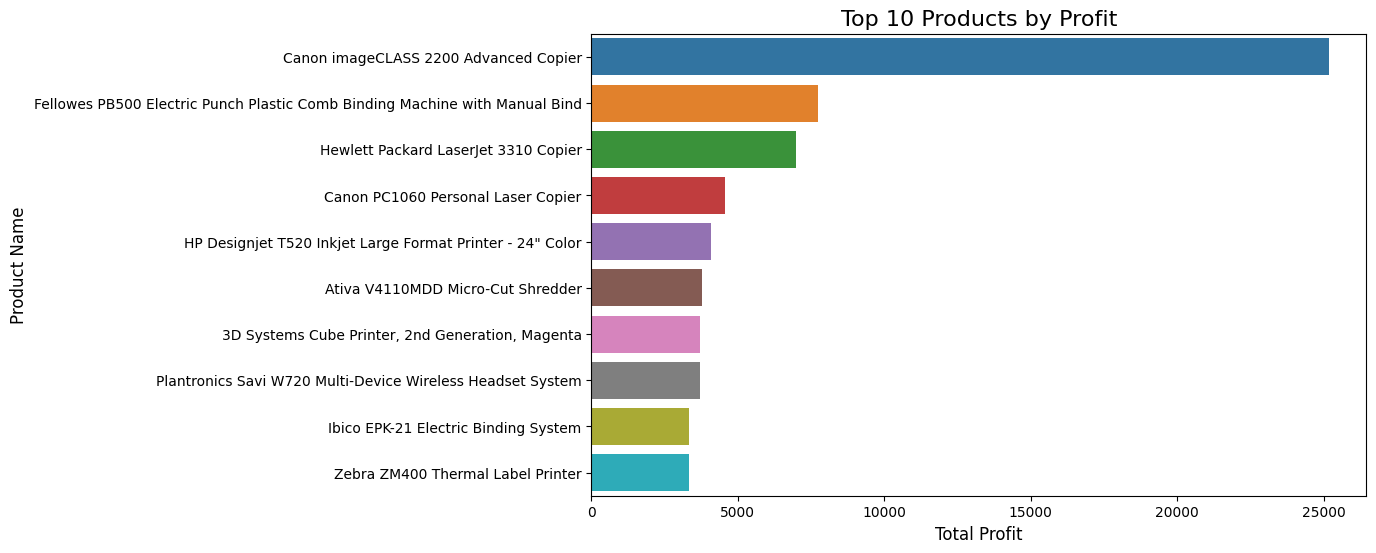

In [ ]:
top_profit_products = df.groupby('Product Name')['Profit'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_profit_products.values, y=top_profit_products.index, hue=top_profit_products.index, legend=False)
plt.title('Top 10 Products by Profit', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

The same product which most sold it is the most achieve for profit

**5. Least products sold**

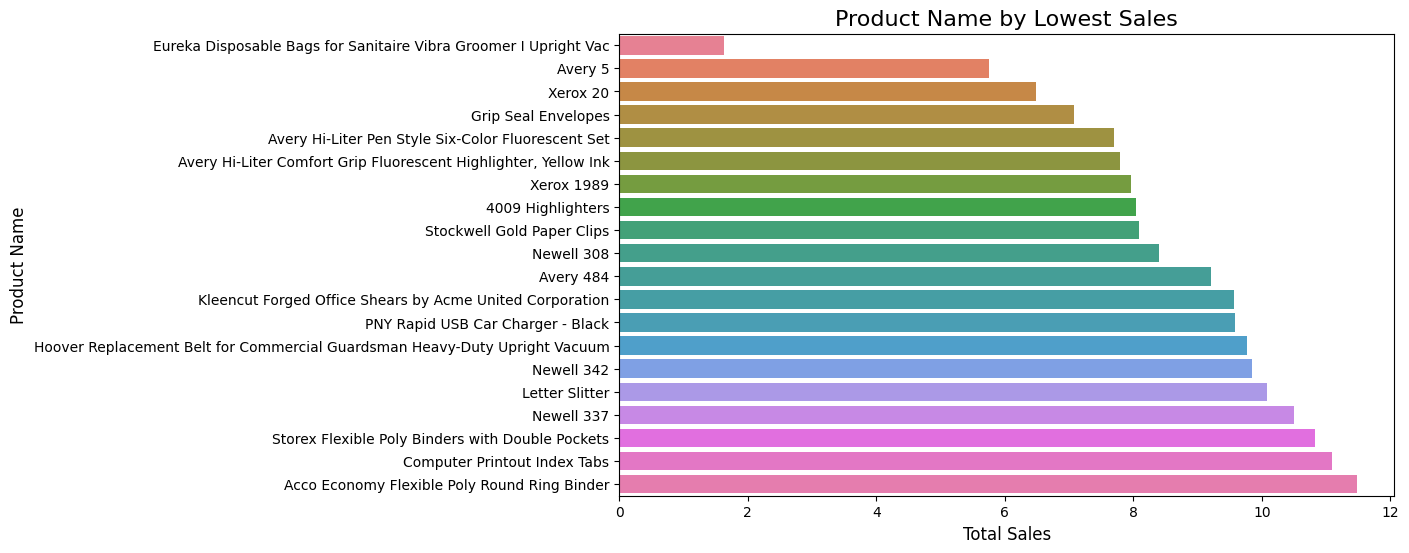

In [ ]:
lowest_profit_products = df.groupby('Product Name')['Sales'].sum().nsmallest(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=lowest_profit_products.values, y=lowest_profit_products.index, hue=lowest_profit_products.index, dodge=False)
plt.title('Product Name by Lowest Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.legend([], [], frameon=False)
plt.show()

**6. Most products achieve Loss**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


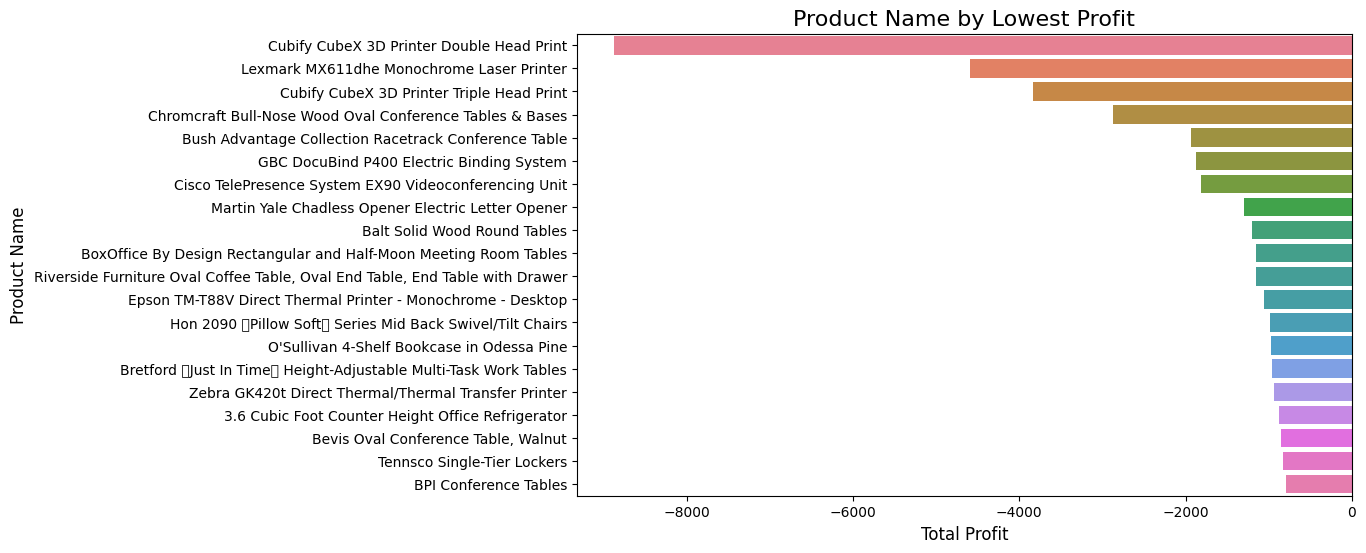

In [ ]:
lowest_profit_products = df.groupby('Product Name')['Profit'].sum().nsmallest(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=lowest_profit_products.values, y=lowest_profit_products.index, hue=lowest_profit_products.index, dodge=False)
plt.title('Product Name by Lowest Profit', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.legend([], [], frameon=False)
plt.show()

**7. Monthly Sales trend**

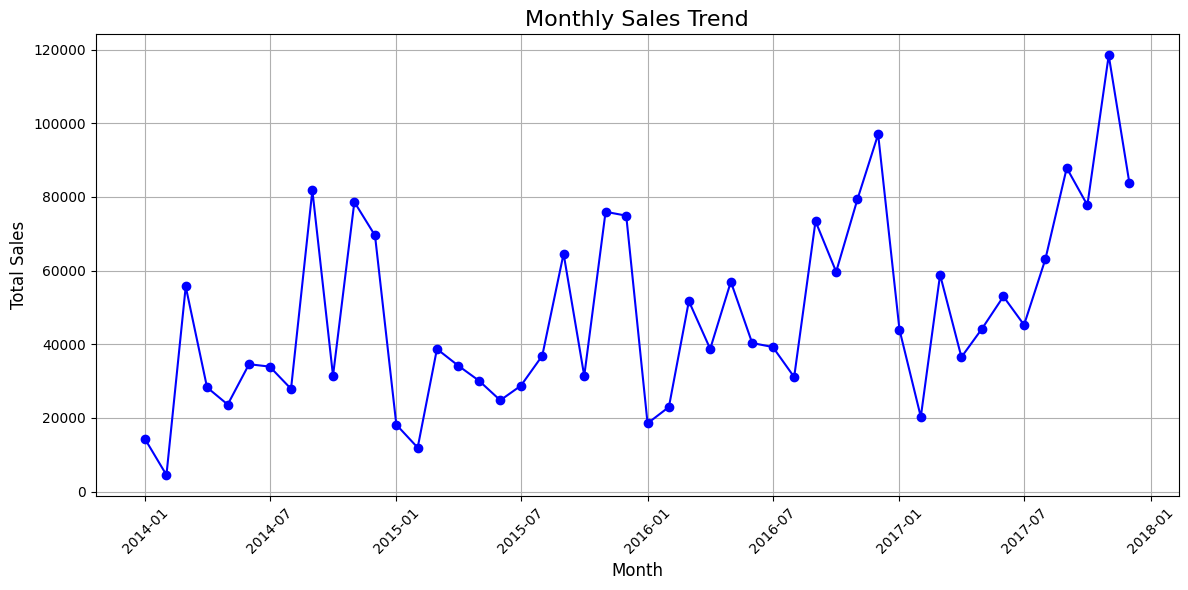

In [ ]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Insights:
1. Sales show a clear upward trend over time, especially in 2017.
2. There are frequent peaks, likely due to seasonal or promotional events.
3. Sales fluctuate heavily, with sharp increases and decreases from month to month.
4. Early 2015 and mid-2016 saw significant drops in sales.
5. End-of-year periods, particularly in 2017, show strong sales growth

8. Ship mode distribution

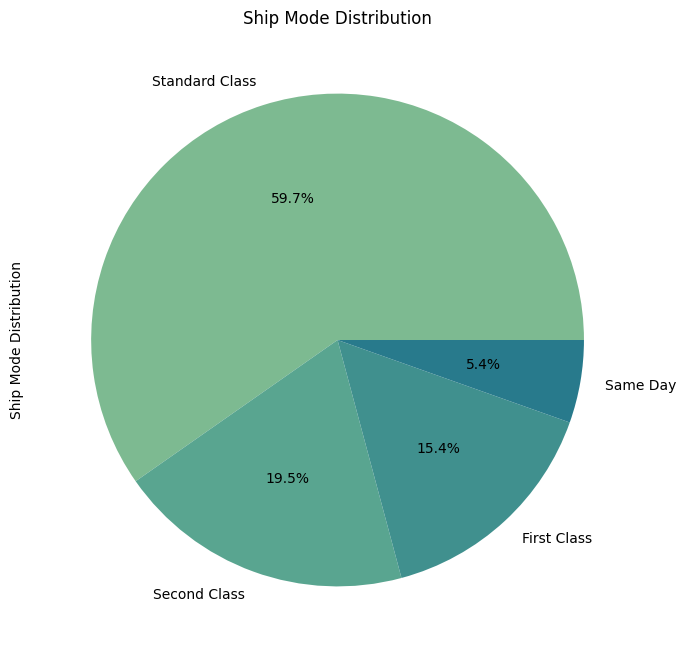

In [ ]:
df['Ship Mode'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), colors=sns.color_palette('crest'))
plt.ylabel('Ship Mode Distribution')
plt.title('Ship Mode Distribution')
plt.show()

The insights:
1. The most frequently used ship mode is standard class
2. The least frequently used ship mode in the same day

**9. Sales by sub-category**

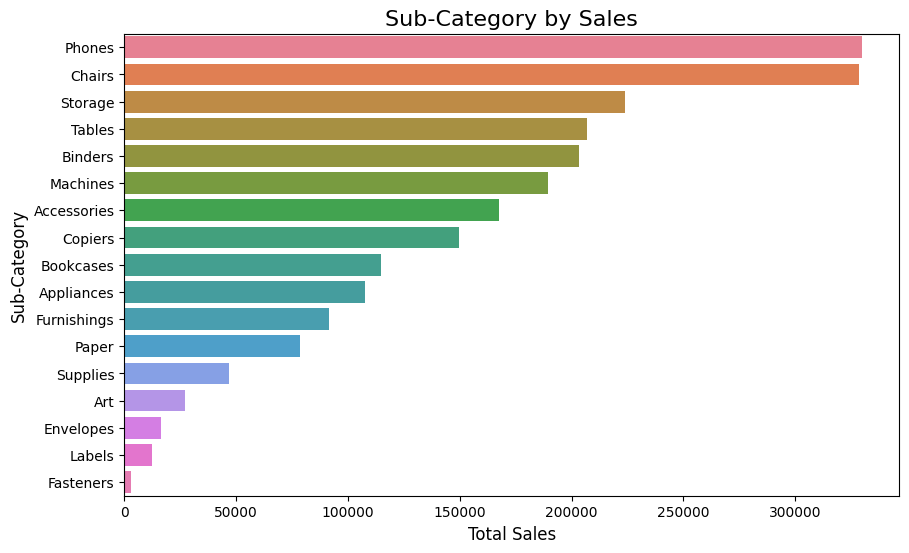

In [ ]:
top_Sales_products = df.groupby('Sub-Category')['Sales'].sum().nlargest(17)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_Sales_products.values, y=top_Sales_products.index, hue=top_Sales_products.index, legend=False)
plt.title('Sub-Category by Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)
plt.show()

Insights:
1. Phones is the most sub category sold
2. Fasteners is the least sub category sold

**10. Sales and Profit by Category**

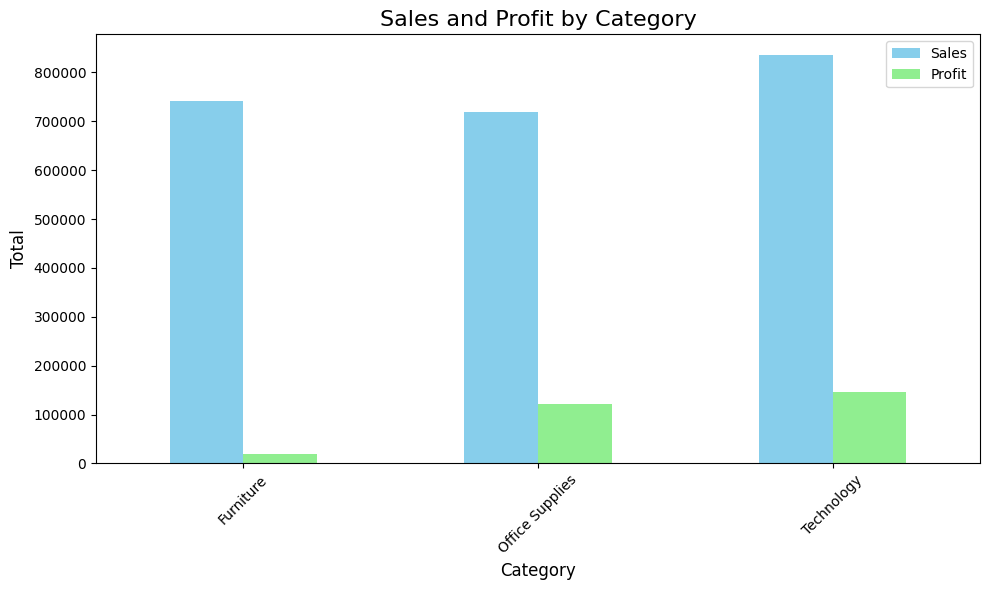

In [ ]:
category_sales_profit = df.groupby('Category')[['Sales', 'Profit']].sum()
category_sales_profit.plot(kind='bar', figsize=(10,6), color=['skyblue', 'lightgreen'])
plt.title('Sales and Profit by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Sales', 'Profit'])
plt.tight_layout()
plt.show()

Insight:
1. Technology is Highest sales and highest profit.
2. Although Furntiure sell more than Office Supplies, office supplies generate more profits than Furntiure.

**11.Sales by region**

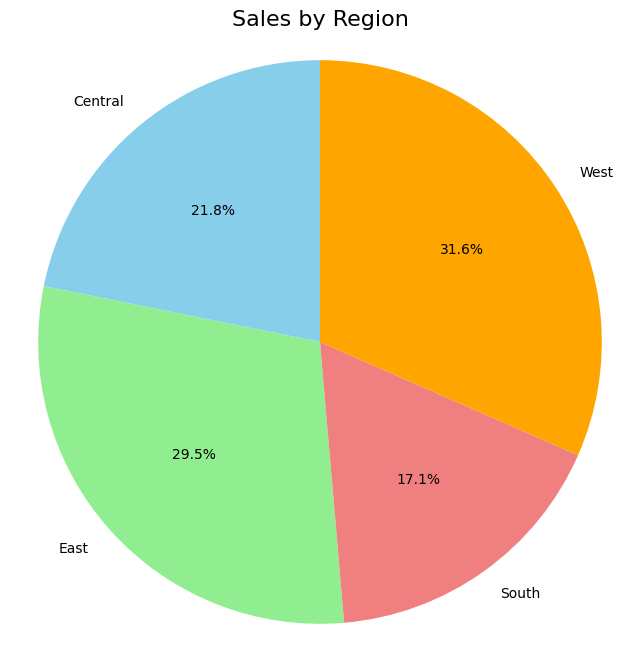

In [ ]:
region_sales = df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8,8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'], startangle=90)
plt.title('Sales by Region', fontsize=16)
plt.axis('equal')
plt.show()

Insights:
1. In the West the Sales are the Highest.
2. In the South the sales are least.

**12. Sub Category by Profit**

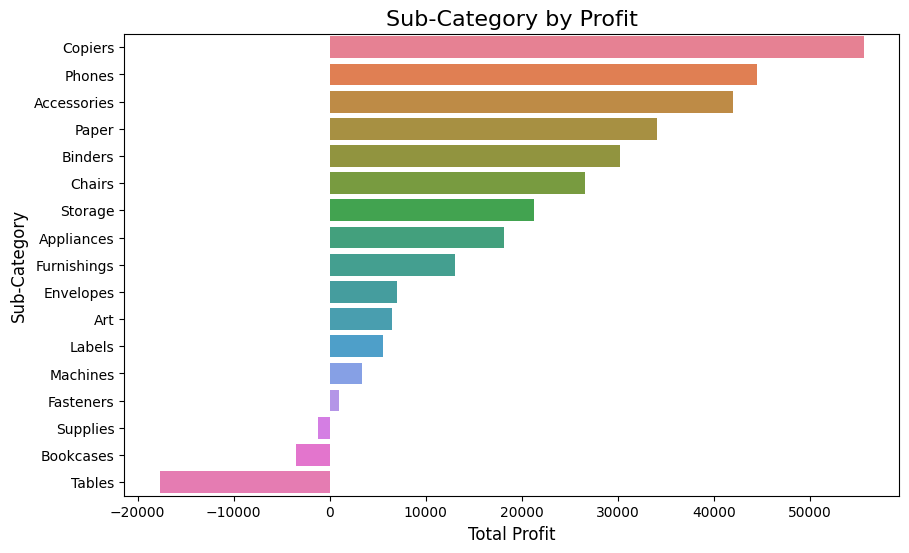

In [ ]:
top_profit_products = df.groupby('Sub-Category')['Profit'].sum().nlargest(17)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_profit_products.values, y=top_profit_products.index, hue=top_profit_products.index, legend=False)
plt.title('Sub-Category by Profit', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)
plt.show()

Insights:
1. The copiers is the most Profit.
2. Supplies, Bookcases and Tables are achieve losses.

**13. Sales by Segment**

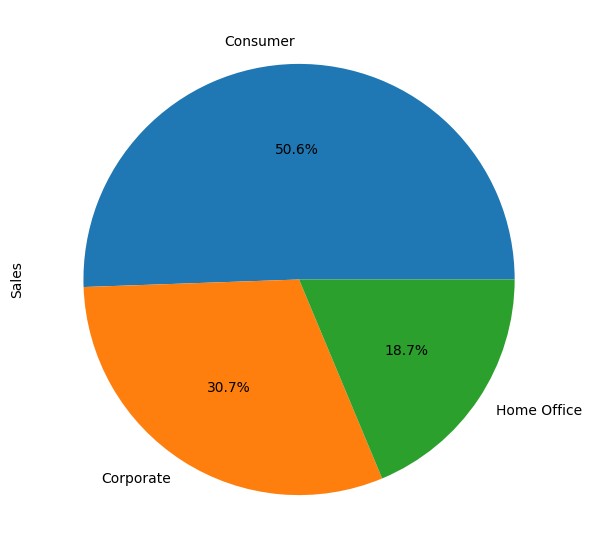

In [ ]:
df.groupby('Segment')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7))
plt.show()

Insights:
Customers is the most segment achieve sales.

**14. The Sales by cities**

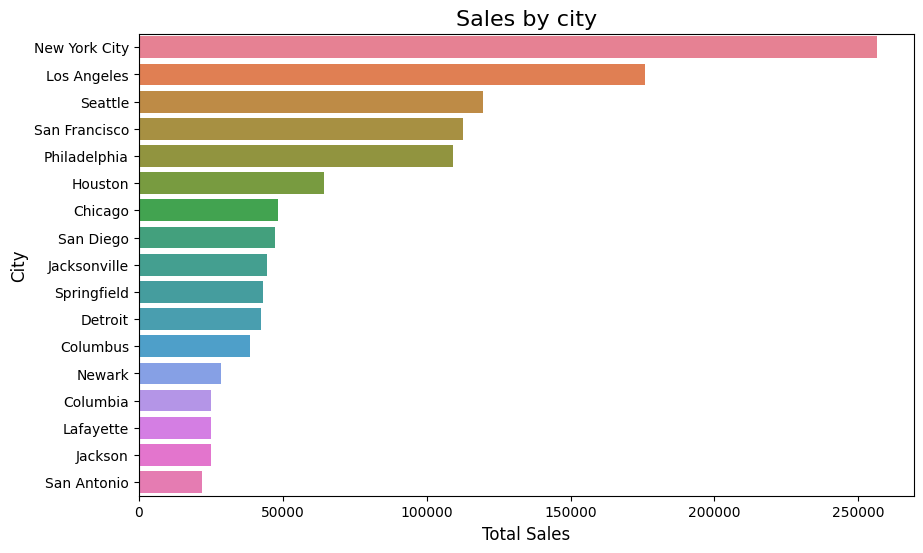

In [ ]:
top_sales_by_city = df.groupby('City')['Sales'].sum().nlargest(17)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sales_by_city.values, y=top_sales_by_city.index, hue=top_sales_by_city.index, legend=False)
plt.title('Sales by city', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

Insights:
1. New work is the most city sold products.
2. San antonio is the least city sold products.

15. Number of Products achieve profit, loss and at POP

In [ ]:
product_profit = df.groupby('Product Name')['Profit'].sum()
Profit_products = product_profit[product_profit > 0]
Profit_products_df = Profit_products.reset_index()
print(Profit_products_df)

                                           Product Name    Profit
0     "While you Were Out" Message Book, One Form pe...   10.3880
1              #10 Gummed Flap White Envelopes, 100/Box   16.7678
2                         #10 Self-Seal White Envelopes   52.1230
3            #10 White Business Envelopes,4 1/8 x 9 1/2  223.1408
4               #10- 4 1/8" x 9 1/2" Recycled Envelopes  115.2806
...                                                 ...       ...
1541                         Zipper Ring Binder Pockets   11.7312
1542           iHome FM Clock Radio with Lightning Dock   17.4975
1543  iKross Bluetooth Portable Keyboard + Cell Phon...  115.6440
1544  invisibleSHIELD by ZAGG Smudge-Free Screen Pro...  171.2648
1545                 netTALK DUO VoIP Telephone Service  430.4180

[1546 rows x 2 columns]


There are 1546 produst achieve profit

In [ ]:
product_profit = df.groupby('Product Name')['Profit'].sum()
products_at_POP = product_profit[product_profit == 0]
products_at_POP = products_at_POP.reset_index()
print(products_at_POP)

                                  Product Name  Profit
0     Alliance Big Bands Rubber Bands, 12/Pack     0.0
1  Avery Trapezoid Extra Heavy Duty 4" Binders     0.0
2             Belkin OmniView SE Rackmount Kit     0.0


Insight: There are 3 product without Profit or loss

In [ ]:
product_profit = df.groupby('Product Name')['Profit'].sum()
loss_products = product_profit[product_profit < 0]
loss_products_df = loss_products.reset_index()
print(loss_products_df)

                                          Product Name    Profit
0    3.6 Cubic Foot Counter Height Office Refrigerator -872.0752
1                             36X48 HARDFLOOR CHAIRMAT  -40.4914
2       3D Systems Cube Printer, 2nd Generation, White -467.9964
3    3M Replacement Filter for Office Air Cleaner f...  -20.4768
4    ARKON Windshield Dashboard Air Vent Car Mount ...  -15.5940
..                                                 ...       ...
296  XtraLife ClearVue Slant-D Ring Binders by Card...  -13.3280
297  Zebra GK420t Direct Thermal/Thermal Transfer P... -938.2800
298                  i.Sound Portable Power - 8000 mAh  -58.8189
299                         iOttie HLCRIO102 Car Mount  -11.9940
300                                iOttie XL Car Mount  -50.3748

[301 rows x 2 columns]


# **Heatmap for Sales, Quantity, Profit and Discount**

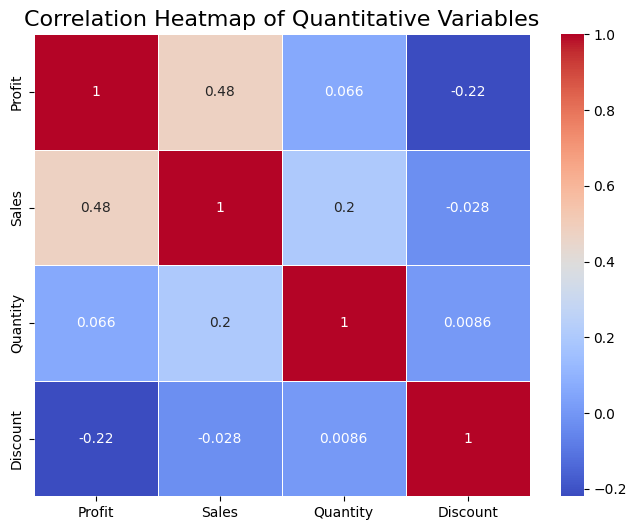

In [ ]:
correlation_matrix = df[['Profit', 'Sales', 'Quantity','Discount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Quantitative Variables', fontsize=16)
plt.show()

The Insights:
1. A **moderate positive** relationship between Progit and Sales. When Sales goes up, the Profit often goes up too.
2. **Weak positive** relationships between quantity and sales , quantity and profit . When Quantity goes up, Sales and Profit might go up a little, but the connection is small.
3. **Weak negative** relationships between Discount and Profit, Discount and Sales. When Discount goes up, Sales and profit might go down a bit, but the link is not strong.
4. **Almost no relationship** between Quantity and Discount.

In [ ]:
from google.colab import files

In [ ]:
files.download('Sample - Superstore.csv')

FileNotFoundError: Cannot find file: Sample - Superstore.csv

# model

# 1. Import Necessary Libraries

In [ ]:
# Additional necessary imports for modeling and scaling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# 2. Correlation Analysis¶

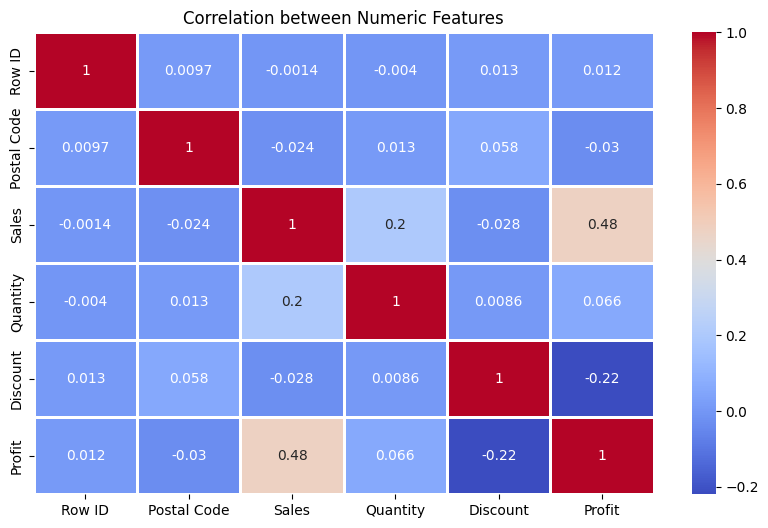

In [ ]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number])

# Plot correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=1)
plt.title("Correlation between Numeric Features")
plt.show()

In [ ]:


# Load the data
df = pd.read_csv('/content/sample_data/Sample - Superstore.csv', encoding='ISO-8859-1')

# Data preprocessing: Convert order dates to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Feature engineering (year, month, day)
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day

# Define features and target variable
X = df[['Profit', 'Quantity', 'Discount', 'Order Year', 'Order Month', 'Order Day', 'Ship Mode', 'Segment', 'Region']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up column transformer for preprocessing
numeric_features = ['Profit', 'Quantity', 'Discount', 'Order Year', 'Order Month', 'Order Day']
categorical_features = ['Ship Mode', 'Segment', 'Region']

# Create numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create Random Forest model
model = RandomForestRegressor(random_state=42)

# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Predict using the optimized model
y_pred = grid_search.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE

# Display evaluation results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

# Save the trained model
joblib.dump(grid_search, 'best_model.pkl')
print("Model saved as best_model.pkl")



Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}
R² Score: 0.5170
Mean Squared Error: 285306.7457
Root Mean Squared Error: 534.1411
Model saved as best_model.pkl


# Save the model


In [ ]:
# Additional necessary imports
import joblib  # Correctly import joblib

# Save the best model from GridSearchCV
joblib.dump(grid_search.best_estimator_, 'best_model.pkl')
print("Model saved as best_model.pkl")

Model saved as best_model.pkl


In [ ]:
loaded_model = joblib.load('best_model.pkl')

# Test the model


In [ ]:
import pandas as pd
import joblib

# Load the model
loaded_model = joblib.load('best_model.pkl')

# Prepare your new data with the provided details
new_data = pd.DataFrame({
    'Ship Mode': ['Second Class'],
    'Customer ID': ['CG-12520'],
    'Customer Name': ['Claire Gute'],
    'Segment': ['Consumer'],
    'Country': ['United States'],
    'City': ['Henderson'],
    'State': ['Kentucky'],
    'Postal Code': ['42420'],
    'Region': ['South'],
    'Product ID': ['FUR-CH-10000454'],
    'Category': ['Furniture'],
    'Sub-Category': ['Chairs'],
    'Product Name': ['Hon Deluxe Fabric Upholstered Stacking Chairs'],
    'Order Year': [2016],  # استخدم سنة الطلب من البيانات
    'Order Month': [11],    # استخدم شهر الطلب من البيانات
    'Shipping Duration': [3],  # يمكنك استخدام مدة الشحن المناسبة
    'Order Day': [8],       # استخدم يوم الطلب من البيانات
    'Discount': [0.00],     # القيمة الافتراضية
    'Profit': [219.5820],    # القيمة من البيانات
    'Quantity': [3]         # الكمية من البيانات
})

# If necessary, apply any preprocessing steps here (e.g., encoding categorical variables)

# Make predictions using the loaded model
predicted_sales = loaded_model.predict(new_data)

# Print the predictions
print(f"Predicted Sales: {predicted_sales[0]}")

Predicted Sales: 732.1917528501021


<h1>Sales forecast for 2018 in quarters

In [ ]:
df['Order Year'] = 2018

df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day


In [ ]:
q1_data = df[(df['Order Month'] >= 1) & (df['Order Month'] <= 3)]
q2_data = df[(df['Order Month'] >= 4) & (df['Order Month'] <= 6)]
q3_data = df[(df['Order Month'] >= 7) & (df['Order Month'] <= 9)]
q4_data = df[(df['Order Month'] >= 10) & (df['Order Month'] <= 12)]


In [ ]:
sales_q1 = loaded_model.predict(q1_data[['Profit', 'Quantity', 'Discount', 'Order Year', 'Order Month', 'Order Day', 'Ship Mode', 'Segment', 'Region']]).mean()
sales_q2 = loaded_model.predict(q2_data[['Profit', 'Quantity', 'Discount', 'Order Year', 'Order Month', 'Order Day', 'Ship Mode', 'Segment', 'Region']]).mean()
sales_q3 = loaded_model.predict(q3_data[['Profit', 'Quantity', 'Discount', 'Order Year', 'Order Month', 'Order Day', 'Ship Mode', 'Segment', 'Region']]).mean()
sales_q4 = loaded_model.predict(q4_data[['Profit', 'Quantity', 'Discount', 'Order Year', 'Order Month', 'Order Day', 'Ship Mode', 'Segment', 'Region']]).mean()
sales_predictions = [sales_q1, sales_q2, sales_q3, sales_q4]


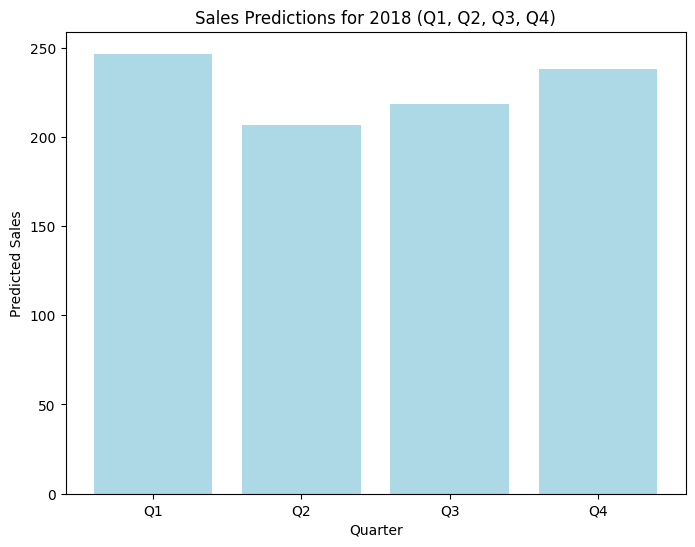

In [ ]:
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
plt.figure(figsize=(8, 6))
plt.bar(quarters, sales_predictions, color='lightblue')
plt.title('Sales Predictions for 2018 (Q1, Q2, Q3, Q4)')
plt.xlabel('Quarter')
plt.ylabel('Predicted Sales')
plt.show()